In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
from fbprophet import Prophet

In [3]:
f1=pd.read_csv('chicago_crime_2014.csv',error_bad_lines=False)
f2=pd.read_csv('chicago_crime_2015.csv',error_bad_lines=False)
f3=pd.read_csv('chicago_crime_2016.csv',error_bad_lines=False)


C:\Users\arai5\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


In [4]:
f=pd.concat([f1,f2,f3])

In [24]:
f.head()

,Date,Block,Primary Type,Description,Location Description,Arrest,Domestic
0,2014-01-01 02:00:00,0000X W ILLINOIS ST,BATTERY,SIMPLE,STREET,False,False
1,2014-01-01 00:00:00,006XX N DEARBORN ST,THEFT,FROM BUILDING,BAR OR TAVERN,False,False
2,2014-01-01 00:30:00,052XX W RACE AVE,CRIMINAL DAMAGE,TO PROPERTY,APARTMENT,False,False
3,2014-01-01 00:30:00,053XX W WELLINGTON AVE,BATTERY,SIMPLE,APARTMENT,True,False
4,2014-01-01 00:10:00,014XX W LEXINGTON ST,BATTERY,SIMPLE,STREET,False,False


In [6]:
f1.shape

(274423, 17)

In [7]:
import seaborn as sns

In [8]:
plt.figure(figsize=(10,10))

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<AxesSubplot:>

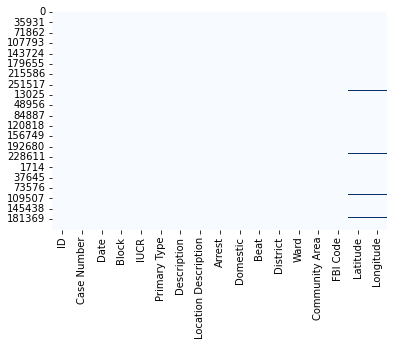

In [9]:
sns.heatmap(f.isnull(),cbar=False,cmap='Blues')

# visualize the data upper part which part has null value

In [23]:
f.head(3)

,Date,Block,Primary Type,Description,Location Description,Arrest,Domestic
0,2014-01-01 02:00:00,0000X W ILLINOIS ST,BATTERY,SIMPLE,STREET,False,False
1,2014-01-01 00:00:00,006XX N DEARBORN ST,THEFT,FROM BUILDING,BAR OR TAVERN,False,False
2,2014-01-01 00:30:00,052XX W RACE AVE,CRIMINAL DAMAGE,TO PROPERTY,APARTMENT,False,False


In [22]:
f.drop(['ID','Case Number','IUCR','Beat','District','Ward','Community Area','FBI Code','Latitude','Longitude'],axis=1)

KeyError: "['ID' 'Case Number' 'IUCR' 'Beat' 'District' 'Ward' 'Community Area'\n 'FBI Code' 'Latitude' 'Longitude'] not found in axis"

# Separating date and time 

In [19]:
f.Date=pd.to_datetime(f.Date,format='%m/%d/%Y %I:%M:%S %p')

In [38]:
f.Date.head()

Date
2014-01-01 02:00:00   2014-01-01 02:00:00
2014-01-01 00:00:00   2014-01-01 00:00:00
2014-01-01 00:30:00   2014-01-01 00:30:00
2014-01-01 00:30:00   2014-01-01 00:30:00
2014-01-01 00:10:00   2014-01-01 00:10:00
Name: Date, dtype: datetime64[ns]

In [20]:
f

,Date,Block,Primary Type,Description,Location Description,Arrest,Domestic
0,2014-01-01 02:00:00,0000X W ILLINOIS ST,BATTERY,SIMPLE,STREET,False,False
1,2014-01-01 00:00:00,006XX N DEARBORN ST,THEFT,FROM BUILDING,BAR OR TAVERN,False,False
2,2014-01-01 00:30:00,052XX W RACE AVE,CRIMINAL DAMAGE,TO PROPERTY,APARTMENT,False,False
3,2014-01-01 00:30:00,053XX W WELLINGTON AVE,BATTERY,SIMPLE,APARTMENT,True,False
4,2014-01-01 00:10:00,014XX W LEXINGTON ST,BATTERY,SIMPLE,STREET,False,False
...,...,...,...,...,...,...,...
217285,2016-01-17 12:00:00,014XX N ARTESIAN AVE,OTHER OFFENSE,OTHER VEHICLE OFFENSE,STREET,False,True
217286,2016-01-16 22:00:00,012XX S WESTERN AVE,OTHER OFFENSE,OTHER VEHICLE OFFENSE,STREET,False,False
217287,2016-01-08 11:10:00,057XX S CICERO AVE,THEFT,FROM BUILDING,AIRPORT BUILDING NON-TERMINAL - NON-SECURE AREA,False,False
217288,2016-01-23 01:00:00,001XX S LEAVITT ST,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False


In [26]:
f['Primary Type'].value_counts()

THEFT                                168404
BATTERY                              140287
CRIMINAL DAMAGE                       82038
NARCOTICS                             63194
ASSAULT                               49568
OTHER OFFENSE                         48458
DECEPTIVE PRACTICE                    44127
BURGLARY                              38991
MOTOR VEHICLE THEFT                   29019
ROBBERY                               28885
CRIMINAL TRESPASS                     19180
WEAPONS VIOLATION                      9302
PUBLIC PEACE VIOLATION                 6676
OFFENSE INVOLVING CHILDREN             6461
CRIM SEXUAL ASSAULT                    3835
PROSTITUTION                           3662
INTERFERENCE WITH PUBLIC OFFICER       3477
SEX OFFENSE                            2662
HOMICIDE                               1516
ARSON                                  1284
LIQUOR LAW VIOLATION                    888
GAMBLING                                885
KIDNAPPING                      

In [25]:
f['Primary Type'].value_counts().iloc[:15]

THEFT                         168404
BATTERY                       140287
CRIMINAL DAMAGE                82038
NARCOTICS                      63194
ASSAULT                        49568
OTHER OFFENSE                  48458
DECEPTIVE PRACTICE             44127
BURGLARY                       38991
MOTOR VEHICLE THEFT            29019
ROBBERY                        28885
CRIMINAL TRESPASS              19180
WEAPONS VIOLATION               9302
PUBLIC PEACE VIOLATION          6676
OFFENSE INVOLVING CHILDREN      6461
CRIM SEXUAL ASSAULT             3835
Name: Primary Type, dtype: int64

In [33]:
order_data=f['Primary Type'].value_counts().iloc[:15].index
order_data_Location_Description=f['Location Description'].value_counts().iloc[:15].index

In [34]:
order_data_Location_Description

Index(['STREET', 'RESIDENCE', 'APARTMENT', 'SIDEWALK', 'OTHER',
       'PARKING LOT/GARAGE(NON.RESID.)', 'ALLEY',
       'RESIDENTIAL YARD (FRONT/BACK)', 'SMALL RETAIL STORE', 'RESTAURANT',
       'RESIDENCE PORCH/HALLWAY', 'VEHICLE NON-COMMERCIAL', 'RESIDENCE-GARAGE',
       'SCHOOL, PUBLIC, BUILDING', 'DEPARTMENT STORE'],
      dtype='object')

In [28]:
plt.figure(figsize=(15,10))

<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

<AxesSubplot:xlabel='count', ylabel='Primary Type'>

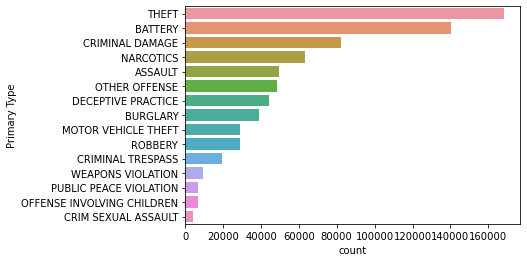

In [30]:
sns.countplot(y='Primary Type',data=f,order=order_data)
#plot the crime against counting in x axis in order of max to min

<AxesSubplot:xlabel='count', ylabel='Location Description'>

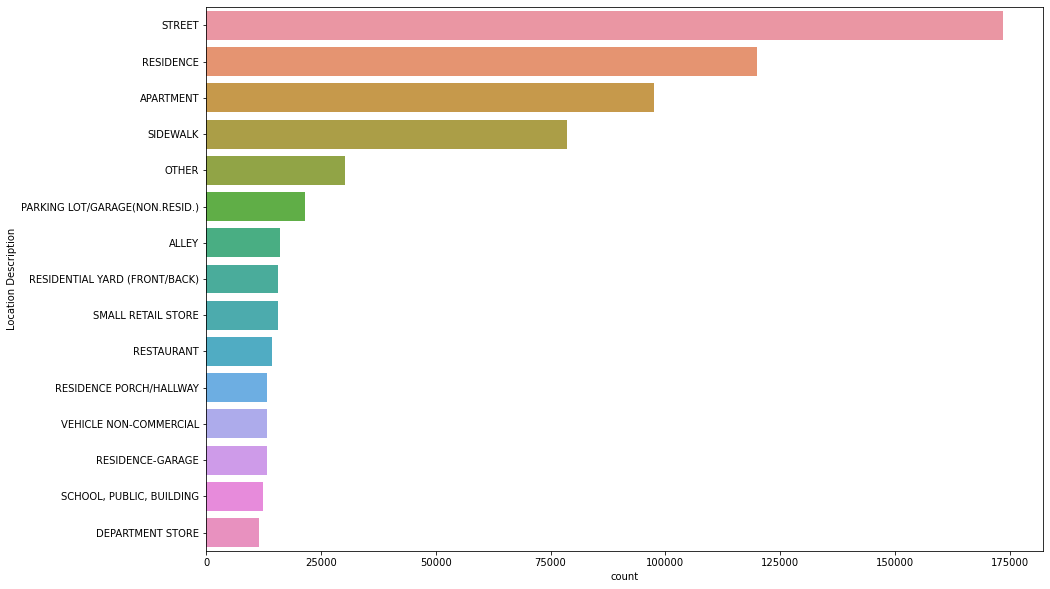

In [35]:
plt.figure(figsize=(15,10))
sns.countplot(y='Location Description',data=f,order=order_data_Location_Description)

In [40]:
f.index=pd.DatetimeIndex(f.Date)
#need date to analyze the year and crimes and count 

In [41]:
f

,Date,Block,Primary Type,Description,Location Description,Arrest,Domestic
Date,,,,,,,
2014-01-01 02:00:00,2014-01-01 02:00:00,0000X W ILLINOIS ST,BATTERY,SIMPLE,STREET,False,False
2014-01-01 00:00:00,2014-01-01 00:00:00,006XX N DEARBORN ST,THEFT,FROM BUILDING,BAR OR TAVERN,False,False
2014-01-01 00:30:00,2014-01-01 00:30:00,052XX W RACE AVE,CRIMINAL DAMAGE,TO PROPERTY,APARTMENT,False,False
2014-01-01 00:30:00,2014-01-01 00:30:00,053XX W WELLINGTON AVE,BATTERY,SIMPLE,APARTMENT,True,False
2014-01-01 00:10:00,2014-01-01 00:10:00,014XX W LEXINGTON ST,BATTERY,SIMPLE,STREET,False,False
...,...,...,...,...,...,...,...
2016-01-17 12:00:00,2016-01-17 12:00:00,014XX N ARTESIAN AVE,OTHER OFFENSE,OTHER VEHICLE OFFENSE,STREET,False,True
2016-01-16 22:00:00,2016-01-16 22:00:00,012XX S WESTERN AVE,OTHER OFFENSE,OTHER VEHICLE OFFENSE,STREET,False,False
2016-01-08 11:10:00,2016-01-08 11:10:00,057XX S CICERO AVE,THEFT,FROM BUILDING,AIRPORT BUILDING NON-TERMINAL - NON-SECURE AREA,False,False


In [54]:
sample=f.resample('Y').size()
#How many crimes occured in year 
# Year - count
#'Y' denotes Year

Text(0, 0.5, 'Number of Crimes')

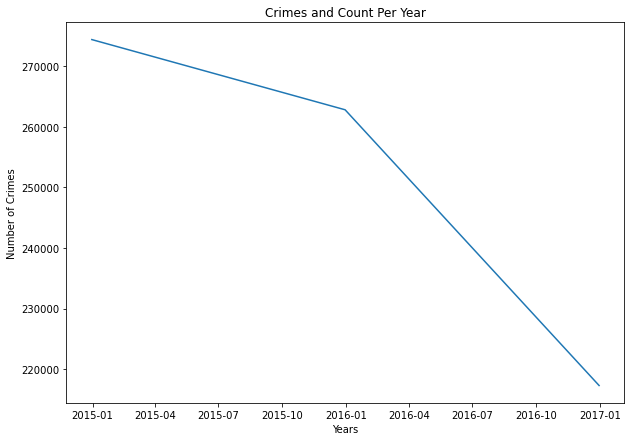

In [56]:
plt.figure(figsize=(10,7))
plt.plot(sample)
plt.title('Crimes and Count Per Year')
plt.xlabel('Years')
plt.ylabel('Number of Crimes')

Text(0, 0.5, 'Number of Crimes')

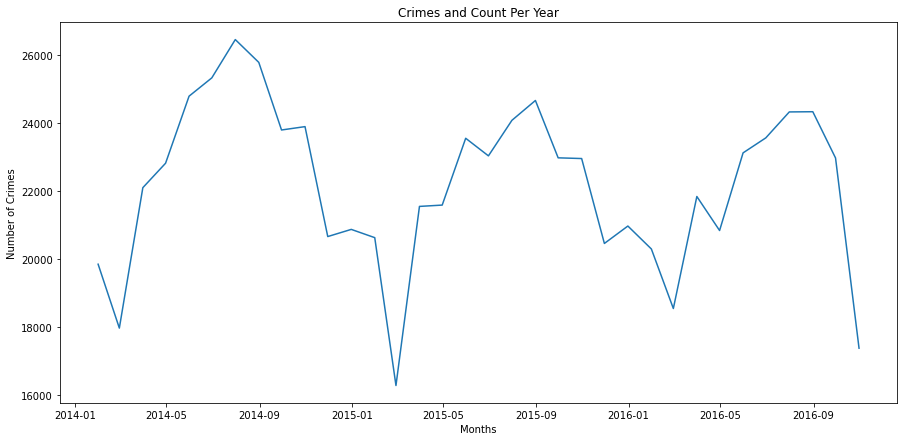

In [57]:
#As we see crime decreases according to the up comming years
plt.figure(figsize=(15,7))
sampleM=f.resample('M').size()
plt.plot(sampleM)
plt.title('Crimes and Count Per Year')
plt.xlabel('Months')
plt.ylabel('Number of Crimes')

# Prepare the Data

In [58]:
chicago_f=f.resample('M').size().reset_index()

In [60]:
chicago_f.head()

,Date,0
0,2014-01-31,19853
1,2014-02-28,17971
2,2014-03-31,22107
3,2014-04-30,22827
4,2014-05-31,24802


In [61]:
chicago_f.columns=['Date','Crime_count']

In [62]:
chicago_f

,Date,Crime_count
0,2014-01-31,19853
1,2014-02-28,17971
2,2014-03-31,22107
3,2014-04-30,22827
4,2014-05-31,24802
5,2014-06-30,25341
6,2014-07-31,26469
7,2014-08-31,25797
8,2014-09-30,23806
9,2014-10-31,23905


In [63]:
#using fbprophet 
chicago_f_final=chicago_f.rename(columns={'Date': 'ds','Crime_count':'y'})

In [64]:
chicago_f_final

,ds,y
0,2014-01-31,19853
1,2014-02-28,17971
2,2014-03-31,22107
3,2014-04-30,22827
4,2014-05-31,24802
5,2014-06-30,25341
6,2014-07-31,26469
7,2014-08-31,25797
8,2014-09-30,23806
9,2014-10-31,23905


# Make Prediction

In [65]:
m = Prophet()

In [66]:
m.fit(chicago_f_final)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [73]:
future = m.make_future_dataframe(periods=730)
forecast = m.predict(future)
#it is going to predict 730 days next from given data means 2 years

In [74]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2014-01-31,24118.411734,19376.842297,20670.828457,24118.411734,24118.411734,-4108.537869,-4108.537869,-4108.537869,-4108.537869,-4108.537869,-4108.537869,0.0,0.0,0.0,20009.873865
1,2014-02-28,24053.639490,17531.102226,18774.556791,24053.639490,24053.639490,-5918.453437,-5918.453437,-5918.453437,-5918.453437,-5918.453437,-5918.453437,0.0,0.0,0.0,18135.186053
2,2014-03-31,23981.927358,22030.394145,23262.477130,23981.927358,23981.927358,-1382.394644,-1382.394644,-1382.394644,-1382.394644,-1382.394644,-1382.394644,0.0,0.0,0.0,22599.532714
3,2014-04-30,23912.528520,22049.506466,23298.854104,23912.528520,23912.528520,-1234.102718,-1234.102718,-1234.102718,-1234.102718,-1234.102718,-1234.102718,0.0,0.0,0.0,22678.425802
4,2014-05-31,23840.816383,24073.450575,25341.300651,23840.816383,23840.816383,875.440134,875.440134,875.440134,875.440134,875.440134,875.440134,0.0,0.0,0.0,24716.256517
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
759,2018-10-27,20497.625876,41666.995882,42985.380624,20458.629977,20534.272797,21807.420345,21807.420345,21807.420345,21807.420345,21807.420345,21807.420345,0.0,0.0,0.0,42305.046221
760,2018-10-28,20495.617191,36515.734230,37780.482121,20456.548045,20532.345056,16654.169768,16654.169768,16654.169768,16654.169768,16654.169768,16654.169768,0.0,0.0,0.0,37149.786959
761,2018-10-29,20493.608505,30979.482046,32218.486102,20454.466113,20530.436154,11122.593842,11122.593842,11122.593842,11122.593842,11122.593842,11122.593842,0.0,0.0,0.0,31616.202347
762,2018-10-30,20491.599820,25154.981230,26446.468076,20452.384180,20528.527704,5286.136466,5286.136466,5286.136466,5286.136466,5286.136466,5286.136466,0.0,0.0,0.0,25777.736286


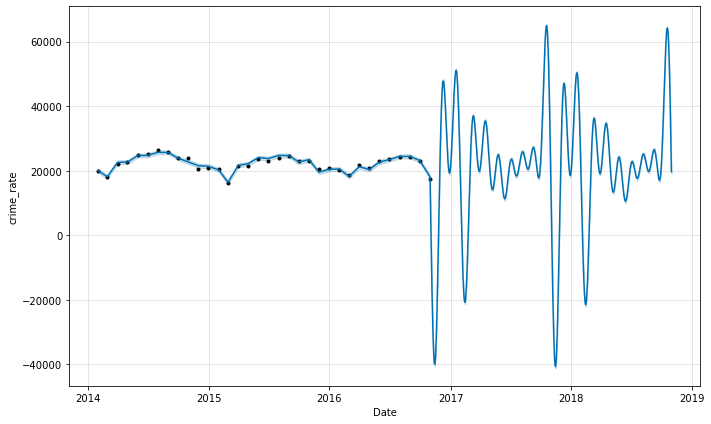

In [75]:
figure = m.plot(forecast,xlabel='Date',ylabel='crime_rate')

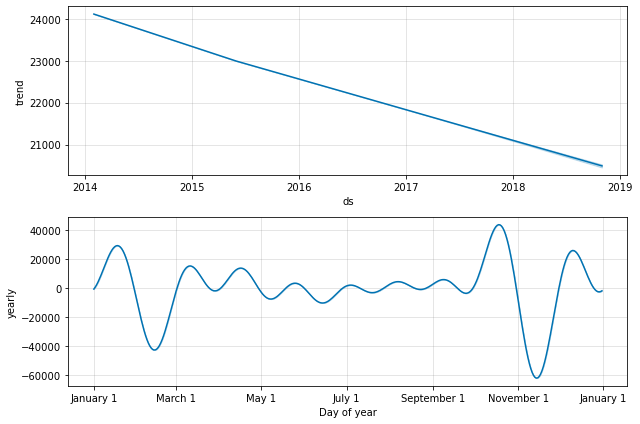

In [76]:
figure = m.plot_components(forecast)